# 1. Define genetic algorithm suite

In [1]:
from sklearn.gaussian_process.kernels import RBF, ConstantKernel

from src.prediction.gpr_model_trainer import GPRModelTrainer
from src.prediction.etr_model_trainer import EtrModelTrainer

from src.ga.chromosome.vent_hole import VentHole

from src.ga.gene.shape.shape_variations import (
    double_parabolic_params,
    circle_params,
    donut_params,
    hole_params,
    trapezoid_params,
    triangle_params,
    wing_params,
)
from src.ga.gene.pattern.pattern_variations import (
    circular_params,
    corn_params,
    grid_params,
)

from src.ga.ga_pipeline import GAPipeline

from src.ga.p1_initialize.init_vent import VentInitializer
from src.ga.p2_fitness.vent_fitness import Criterion, VentFitnessCalculator
from src.ga.p3_select.behaviors import (
    TournamentSelectionFilter,
    ElitismSelectionFilter,
    RouletteWheelSelectionFilter,
)
from src.ga.p4_crossover.behaviors import (
    OnePointCrossover,
    TwoPointCrossover,
    UniformCrossover,
)

# ----------------- Define the GA CONSTANTS -----------------
# 1. Define the criteria weights, w1, w2, w3
CRITERIA_WEIGHT = (1, 1.4, 0.4)

# 2. Define the criteria with direction, min, and max values
DRAG_CRITERION: Criterion = ("lower", 0.2, 0.3)  # Lower is better, range 0.2 to 0.3
DRAG_STD_CRITERION: Criterion = ("lower", 0, 0.05)  # Lower is better, range 0 to 0.05

AVG_TEMP_CRITERION: Criterion = (
    "lower",
    250,
    450,
)  # Lower is better, range 250K to 400K
AVG_TEMP_STD_CRITERION: Criterion = ("lower", 0, 10)  # Lower is better, range 0K to 10K

MAX_TEMP_CRITERION: Criterion = (
    "lower",
    300,
    500,
)  # Lower is better, range 300K to 500K
MAX_TEMP_STD_CRITERION: Criterion = ("lower", 0, 10)  # Lower is better, range 0K to 10K

# 3. Define the grid parameters
GRID_SCALE = 1
# Scaling factor

GRID_RESOLUTION = 2
# Grid resolution

GRID_WIDTH = 100
# Grid width, ~= canvas size

GRID_BOUND = (
    (-GRID_WIDTH / 2, GRID_WIDTH / 2),
    (-GRID_WIDTH / 2, GRID_WIDTH / 2),
)
# ----------------- Define the GA MODELS -----------------

gpr_kernel = ConstantKernel(1.0, (1e-2, 1e2)) * RBF(1.0, (1e-2, 1e2))
gpr_model_trainer = GPRModelTrainer(
    gpr_kernel=gpr_kernel,
    gpr_drag_config=(10, 1e-5),
    gpr_max_temp_config=(10, 1e-3),
    gpr_avg_temp_config=(10, 1e-3),
    grid_bound=GRID_BOUND,
    grid_bound_width=GRID_WIDTH,
    grid_resolution=GRID_RESOLUTION,
    grid_scale=GRID_SCALE,
    desired_variance=0.9,
)

etr_model_trainer = EtrModelTrainer(
    etr_drag_config=(100, 42),
    etr_max_temp_config=(100, 42),
    etr_avg_temp_config=(100, 42),
    grid_bound=GRID_BOUND,
    grid_bound_width=GRID_WIDTH,
    grid_resolution=GRID_RESOLUTION,
    grid_scale=GRID_SCALE,
    desired_variance=0.9,
)

# ----------------- Define the GA PIPELINES -----------------
suite = GAPipeline[VentHole](
    suite_name="exp/Roullete/config",
    suite_max_count=50,
    suite_min_population=20,
    suite_min_chromosome=40,
    crossover_behavior=UniformCrossover(),
    selector_behavior=RouletteWheelSelectionFilter(roulette_pointer_count=4),
    fitness_calculator=VentFitnessCalculator(
        model_trainer_tuple=(
            gpr_model_trainer,
            etr_model_trainer,
            etr_model_trainer,
        ),
        criteria_weight_list=CRITERIA_WEIGHT,
        drag_criterion=DRAG_CRITERION,
        drag_std_criterion=DRAG_STD_CRITERION,
        avg_temp_criterion=AVG_TEMP_CRITERION,
        avg_temp_std_criterion=AVG_TEMP_STD_CRITERION,
        max_temp_criterion=MAX_TEMP_CRITERION,
        max_temp_std_criterion=MAX_TEMP_STD_CRITERION,
    ),
    immediate_exit_condition=lambda x: x[0] >= 0.725 and x[1] >= 0.725,
    mutation_probability=0.01,
    population_initializer=VentInitializer(
        population_size=500,
        grid_scale=GRID_SCALE,
        grid_resolution=GRID_RESOLUTION,
        pattern_bound=GRID_BOUND,
        pattern_gene_pool=[circular_params, corn_params, grid_params],
        shape_gene_pool=[
            double_parabolic_params
        ],
    ),
)

[Storage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[Storage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.j

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: C

-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
----------------------------------------------------
| [ModelTrainer]: PCA optimal founding initialized |
----------------------------------------------------
--------------------------------------------------------------------------------
| [ModelTrainer]: Optimal feature count founded: 151 for desired variance: 0.9 |
--------------------------------------------------------------------------------
-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
----------------------------------------------------
| [ModelTrainer]: PCA optimal founding initialized |
----------------------------------------------------
-------

# 2. Run genetic algorithm

매번 run을 실행할 때마다, 개체 수, 격자 해상도 등에 따라 다르지만, **수행 시간이 길 수 있습니다.**

In [2]:
suite.run()

----------------------------------------------------------------------------------------------------
>> GA started
----------------------------------------------------------------------------------------------------
Suite_name: exp/Roullete/config
Suite_max_count: 50
Suite_min_population: 20
Suite_min_chromosome: 40
Immediate_exit: False
Generation: 0
Initial_population: 500
Population_count: 0
Unique_population_count: 0
Mutation_count: 0
Mutation_probability: 0.01
Fitness_calculator: GPR
Selector_behavior: RouletteWheelSelection
Crossover_behavior: Uniform Crossover
Population_initializer: VentInitializer
----------------------------------------------------------------------------------------------------
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/Roullete/config/fitness_evolution.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/Roullete/config/biased_fitness

c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[Storage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/Roullete/config/fitness_evolution.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/Roullete/config/biased_fitness_evolution.json
[PopulationStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/Roullete/config/population.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/Roullete/config/fitness.json
----------------------------------------------------------------------------------------------------
>> Generation: 43, Population: 344, Unique population: 68, Should Stop: False
----------------------------------------------------------------------------------------------------
[PopulationStorage]: JSON d

# 3. Plot fitness result

- `biased_fitness`: 가중치가 적용된 fitness, $w1 * p1 + w2 * p2+ ...$
- `fitness`: 가중치 없이 계산된 fitness, $p1 + p2 + ...$

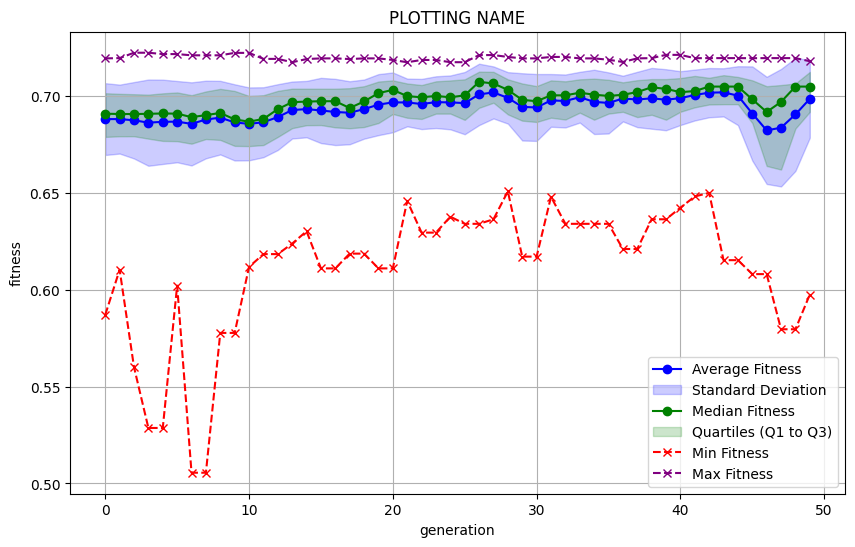

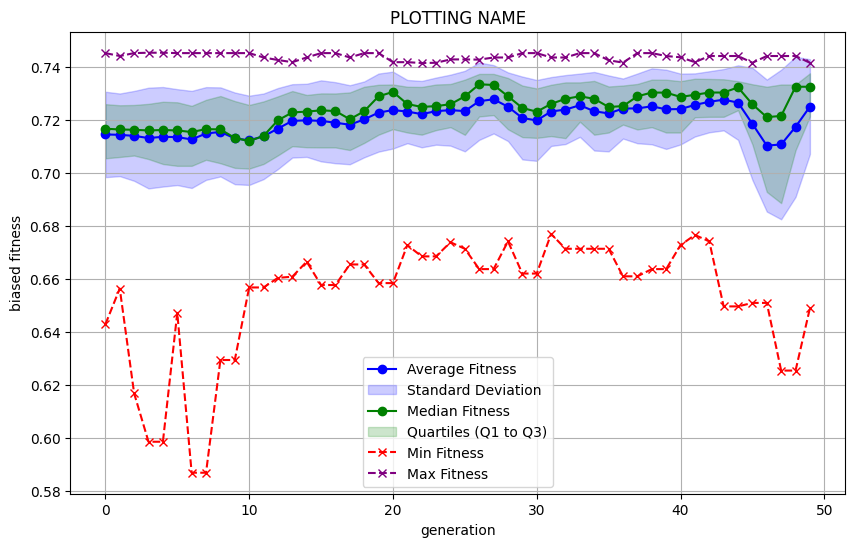

In [3]:
suite.evolution_storage.plot_fitness(
    storage="fitness",
    title="PLOTTING NAME",
    xlabel="generation",
    ylabel="fitness",
)
suite.evolution_storage.plot_fitness(
    storage="biased_fitness",
    title="PLOTTING NAME",
    xlabel="generation",
    ylabel="biased fitness",
)

# 4. Analyze final population(unique)

1. population은 최종 선택된 개체만 남게 됩니다.
2. `population[i]`는 각 VentHole 유전자(Chromosome)이 도출됩니다.
3. `population[i].pattern_matrix` 에는 pattern에 격자화된 point vector가 존재합니다.
3. `population[i].gene_tuple` 을 통해 최종적인 유전자에 접근할 수 있습니다.


--------------------------------------------------
label: VentHole Chromosome_79: ['DoubleParabolicShape_79', 'CornerTransformation_337']
predict: (0.2885180053956322, 373.3190315, 456.9717197999999)
biased_fitness: 0.737643285943678, fitness: 0.7133661895436783
shape parameter:
parameter_list: [ lower_coefficient: 1.1338099648682614, upper_coefficient: 0.0, lower_y-intercept: 2.0917252367448183, upper_y-intercept_from_lower_y: 1.4168298830826904, lower_x_trans: -1.1658484640021607, ]
pattern parameter:
parameter_list: [ di: 8.147181929275078, dx: 7.538579107376082, phi: 0.4279057157661879, rot_count: 3.0, ]


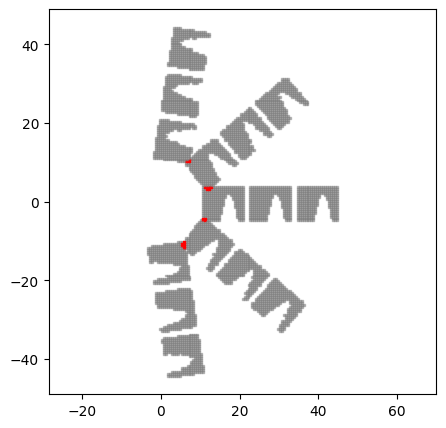

--------------------------------------------------
label: VentHole Chromosome_79: ['DoubleParabolicShape_337', 'GridStrictTransformation_337']
predict: (0.29179121269847386, 373.2899034, 461.82373789999986)
biased_fitness: 0.6954110734152614, fitness: 0.656519666515262
shape parameter:
parameter_list: [ lower_coefficient: 1.1338099648682614, upper_coefficient: 2.279584386425475, lower_y-intercept: 2.0917252367448183, upper_y-intercept_from_lower_y: 1.4168298830826904, lower_x_trans: -1.1658484640021607, ]
pattern parameter:
parameter_list: [ dx: 9.627357922865517, dy: 4.773921984221056, ]


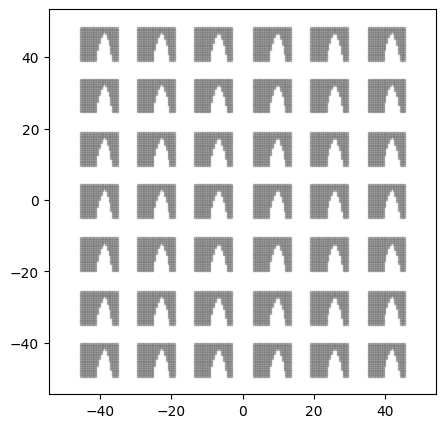

--------------------------------------------------
label: VentHole Chromosome_79: ['DoubleParabolicShape_495', 'GridStrictTransformation_79']
predict: (0.28834533551543773, 372.99993439999986, 457.0325566)
biased_fitness: 0.7414819908456235, fitness: 0.7163841898456232
shape parameter:
parameter_list: [ lower_coefficient: 1.1338099648682614, upper_coefficient: 2.279584386425475, lower_y-intercept: 2.0917252367448183, upper_y-intercept_from_lower_y: 1.4168298830826904, lower_x_trans: -1.1658484640021607, ]
pattern parameter:
parameter_list: [ dx: 9.627357922865517, dy: 4.773921984221056, ]


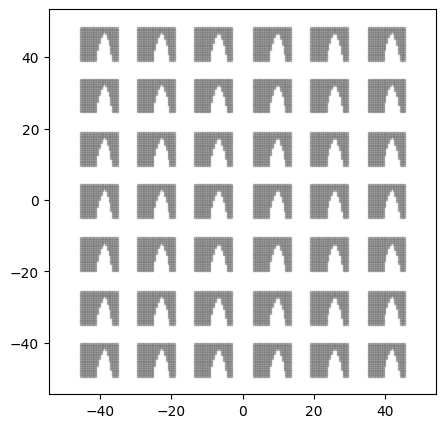

--------------------------------------------------
label: VentHole Chromosome_466: ['DoubleParabolicShape_79', 'CornerTransformation_79']
predict: (0.2885180053956322, 373.3190315, 456.9717197999999)
biased_fitness: 0.737643285943678, fitness: 0.7133661895436783
shape parameter:
parameter_list: [ lower_coefficient: 1.1338099648682614, upper_coefficient: 2.279584386425475, lower_y-intercept: 2.0917252367448183, upper_y-intercept_from_lower_y: 1.4168298830826904, lower_x_trans: -1.1658484640021607, ]
pattern parameter:
parameter_list: [ di: 8.147181929275078, dx: 7.538579107376082, phi: 0.4279057157661879, rot_count: 3.0, ]


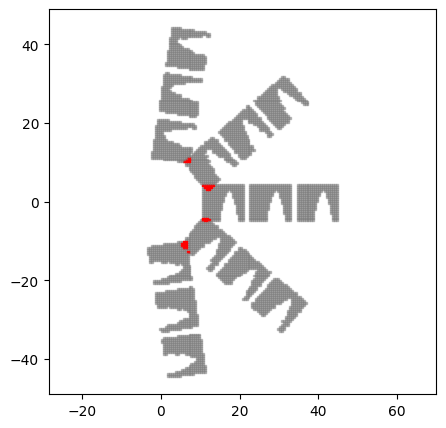

--------------------------------------------------
label: VentHole Chromosome_92: ['DoubleParabolicShape_466', 'CircularStrictTransformation_337']
predict: (0.2906848557331496, 373.43546060000006, 457.0987844)
biased_fitness: 0.7149056496685032, fitness: 0.6904802176685034
shape parameter:
parameter_list: [ lower_coefficient: 1.1338099648682614, upper_coefficient: 2.279584386425475, lower_y-intercept: 2.0917252367448183, upper_y-intercept_from_lower_y: 1.4168298830826904, lower_x_trans: -1.1658484640021607, ]
pattern parameter:
parameter_list: [ di: 11.586554066554307, dx: 1.4915941326936792, phi: 0.41887902047863906, ]


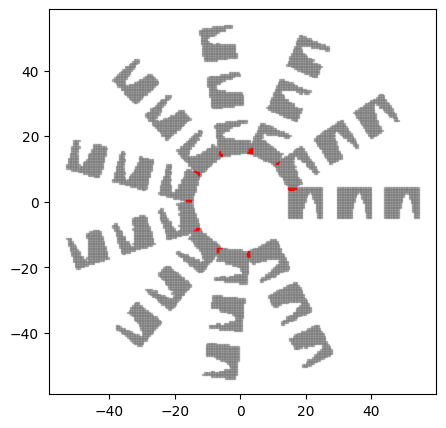

--------------------------------------------------
label: VentHole Chromosome_79: ['DoubleParabolicShape_337', 'CircularStrictTransformation_92']
predict: (0.28871788566537293, 372.90707799999996, 457.47532320000005)
biased_fitness: 0.7375209509462708, fitness: 0.7109091373462706
shape parameter:
parameter_list: [ lower_coefficient: 1.1338099648682614, upper_coefficient: 2.279584386425475, lower_y-intercept: 2.0917252367448183, upper_y-intercept_from_lower_y: 1.4168298830826904, lower_x_trans: -1.1658484640021607, ]
pattern parameter:
parameter_list: [ di: 11.586554066554307, dx: 1.4915941326936792, phi: 0.41887902047863906, ]


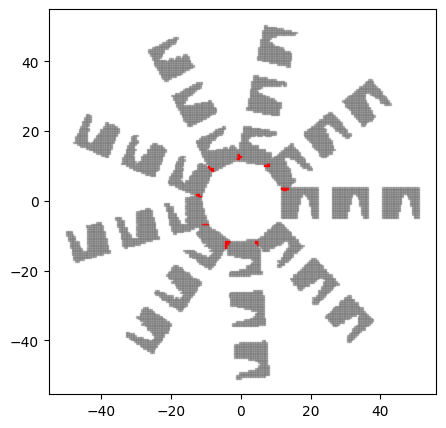

--------------------------------------------------
label: VentHole Chromosome_92: ['DoubleParabolicShape_92', 'CornerTransformation_79']
predict: (0.28917487739793524, 372.77343490000015, 457.77213619999964)
biased_fitness: 0.7332929093206472, fitness: 0.7055233705206486
shape parameter:
parameter_list: [ lower_coefficient: 1.1338099648682614, upper_coefficient: 2.279584386425475, lower_y-intercept: 2.0917252367448183, upper_y-intercept_from_lower_y: 1.4168298830826904, lower_x_trans: -1.1658484640021607, ]
pattern parameter:
parameter_list: [ di: 10.95705114092988, dx: 7.538579107376082, phi: 0.4279057157661879, rot_count: 3.0, ]


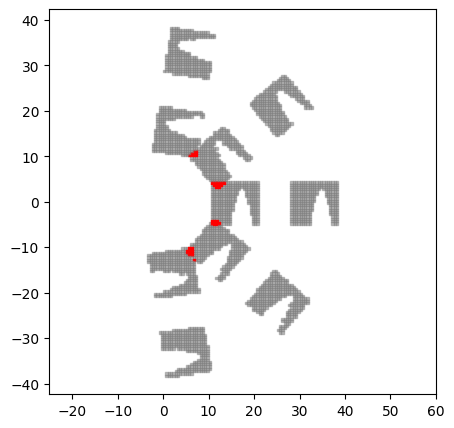

--------------------------------------------------
label: VentHole Chromosome_79: ['DoubleParabolicShape_361', 'CornerTransformation_466']
predict: (0.28855745037575264, 373.11494, 456.6222596999998)
biased_fitness: 0.7393763968424739, fitness: 0.7157394977424745
shape parameter:
parameter_list: [ lower_coefficient: 1.1338099648682614, upper_coefficient: 2.279584386425475, lower_y-intercept: 2.0917252367448183, upper_y-intercept_from_lower_y: 1.4168298830826904, lower_x_trans: -1.1658484640021607, ]
pattern parameter:
parameter_list: [ di: 8.147181929275078, dx: 7.538579107376082, phi: 0.4279057157661879, rot_count: 3.0, ]


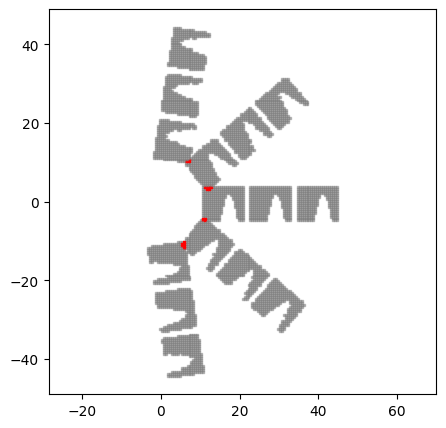

--------------------------------------------------
label: VentHole Chromosome_79: ['DoubleParabolicShape_92', 'CircularStrictTransformation_495']
predict: (0.29004738566788957, 372.9910327000001, 458.57099309999995)
biased_fitness: 0.7214469282211035, fitness: 0.6917160143211039
shape parameter:
parameter_list: [ lower_coefficient: 1.1338099648682614, upper_coefficient: 2.279584386425475, lower_y-intercept: 2.0917252367448183, upper_y-intercept_from_lower_y: 1.4168298830826904, lower_x_trans: -1.1658484640021607, ]
pattern parameter:
parameter_list: [ di: 11.586554066554307, dx: 4.6257002496631765, phi: 0.41887902047863906, ]


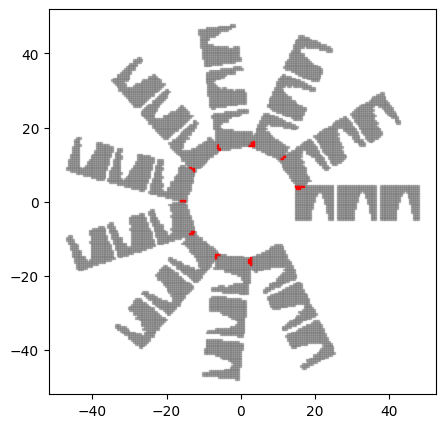

--------------------------------------------------
label: VentHole Chromosome_466: ['DoubleParabolicShape_402', 'GridStrictTransformation_466']
predict: (0.28991039120020634, 373.2906094999999, 457.3032344999998)
biased_fitness: 0.7232553524979375, fitness: 0.6979268679979379
shape parameter:
parameter_list: [ lower_coefficient: 1.1338099648682614, upper_coefficient: 0.0, lower_y-intercept: 2.0917252367448183, upper_y-intercept_from_lower_y: 1.4168298830826904, lower_x_trans: -1.1658484640021607, ]
pattern parameter:
parameter_list: [ dx: 9.627357922865517, dy: 4.773921984221056, ]


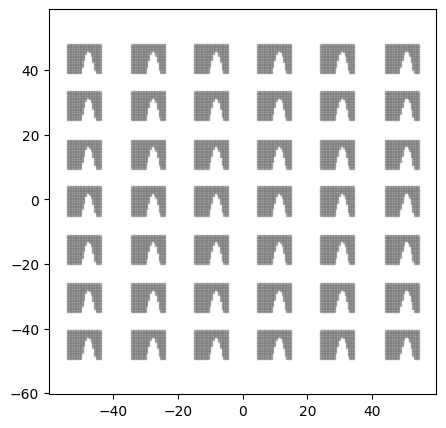

--------------------------------------------------
label: VentHole Chromosome_495: ['DoubleParabolicShape_163', 'CornerTransformation_466']
predict: (0.2893872964066575, 372.98631659999984, 458.197143)
biased_fitness: 0.728828533733426, fitness: 0.7002097379334258
shape parameter:
parameter_list: [ lower_coefficient: 1.1338099648682614, upper_coefficient: 2.279584386425475, lower_y-intercept: 2.0917252367448183, upper_y-intercept_from_lower_y: 1.4168298830826904, lower_x_trans: -1.1658484640021607, ]
pattern parameter:
parameter_list: [ di: 10.95705114092988, dx: 7.538579107376082, phi: 0.4279057157661879, rot_count: 3.0, ]


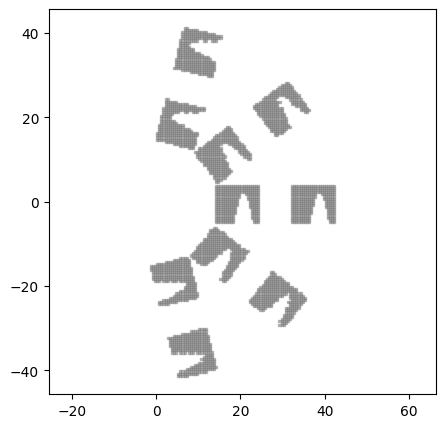

--------------------------------------------------
label: VentHole Chromosome_163: ['DoubleParabolicShape_495', 'GridStrictTransformation_402']
predict: (0.2885190198185583, 372.8895521999998, 458.04861959999994)
biased_fitness: 0.7384856972144183, fitness: 0.710118942814418
shape parameter:
parameter_list: [ lower_coefficient: 1.1338099648682614, upper_coefficient: 0.0, lower_y-intercept: 2.0917252367448183, upper_y-intercept_from_lower_y: 1.4168298830826904, lower_x_trans: -1.1658484640021607, ]
pattern parameter:
parameter_list: [ dx: 9.627357922865517, dy: 4.773921984221056, ]


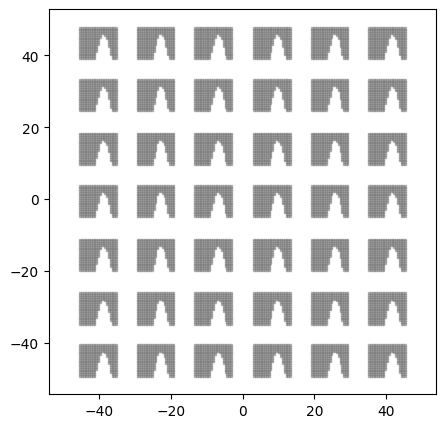

--------------------------------------------------
label: VentHole Chromosome_466: ['DoubleParabolicShape_79', 'CornerTransformation_92']
predict: (0.2897302531476802, 373.4064869, 458.80712510000006)
biased_fitness: 0.7212378100231978, fitness: 0.6916294085231977
shape parameter:
parameter_list: [ lower_coefficient: 1.1338099648682614, upper_coefficient: 2.279584386425475, lower_y-intercept: 2.0917252367448183, upper_y-intercept_from_lower_y: 1.4168298830826904, lower_x_trans: -1.1658484640021607, ]
pattern parameter:
parameter_list: [ di: 10.95705114092988, dx: 7.538579107376082, phi: 0.4279057157661879, rot_count: 3.0, ]


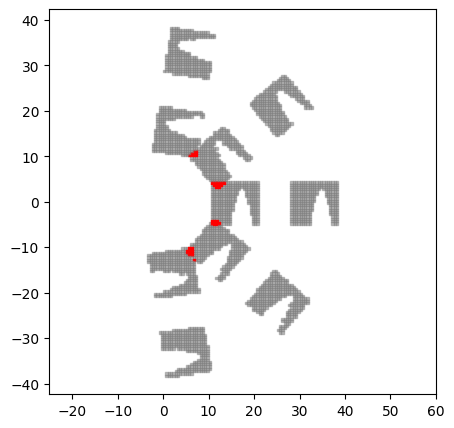

--------------------------------------------------
label: VentHole Chromosome_361: ['DoubleParabolicShape_495', 'CornerTransformation_79']
predict: (0.28996516535484473, 373.390921, 456.69973429999993)
biased_fitness: 0.7232124308515526, fitness: 0.6998950699515529
shape parameter:
parameter_list: [ lower_coefficient: 1.1338099648682614, upper_coefficient: 2.279584386425475, lower_y-intercept: 2.0917252367448183, upper_y-intercept_from_lower_y: 1.4168298830826904, lower_x_trans: -1.1658484640021607, ]
pattern parameter:
parameter_list: [ di: 10.95705114092988, dx: 7.538579107376082, phi: 0.4279057157661879, rot_count: 3.0, ]


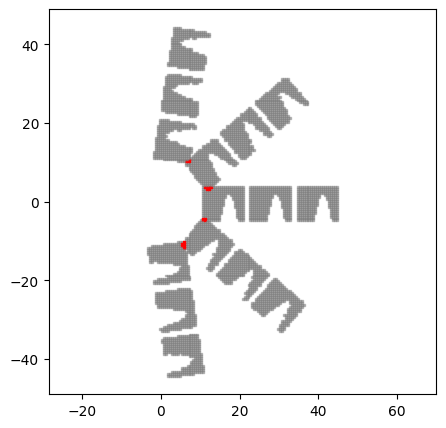

--------------------------------------------------
label: VentHole Chromosome_337: ['DoubleParabolicShape_92', 'CornerTransformation_239']
predict: (0.28949857191341977, 372.86379749999986, 455.68159429999986)
biased_fitness: 0.7336045097658033, fitness: 0.7122873218658036
shape parameter:
parameter_list: [ lower_coefficient: 1.562216773625063, upper_coefficient: 2.279584386425475, lower_y-intercept: 2.0917252367448183, upper_y-intercept_from_lower_y: 1.4168298830826904, lower_x_trans: -1.1658484640021607, ]
pattern parameter:
parameter_list: [ di: 10.95705114092988, dx: 7.538579107376082, phi: 0.4279057157661879, rot_count: 3.0, ]


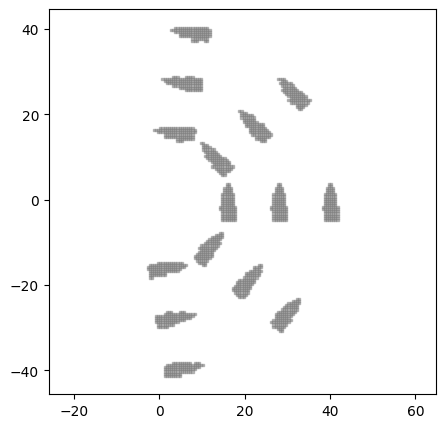

--------------------------------------------------
label: VentHole Chromosome_79: ['DoubleParabolicShape_337', 'CircularStrictTransformation_153']
predict: (0.28883518713882417, 373.0121848999999, 458.0346845999998)
biased_fitness: 0.7344934651117592, fitness: 0.7064137811117596
shape parameter:
parameter_list: [ lower_coefficient: 1.562216773625063, upper_coefficient: 2.279584386425475, lower_y-intercept: 2.0917252367448183, upper_y-intercept_from_lower_y: 1.4168298830826904, lower_x_trans: -1.1658484640021607, ]
pattern parameter:
parameter_list: [ di: 14.892162902705529, dx: 1.4915941326936792, phi: 0.41887902047863906, ]


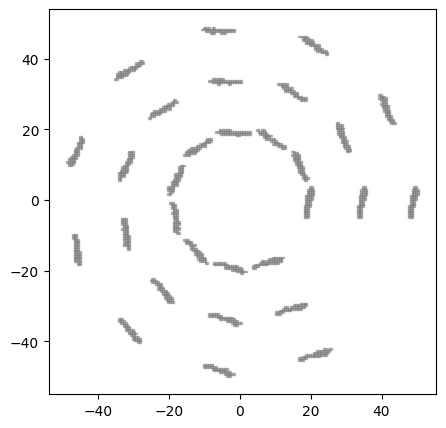

--------------------------------------------------
label: VentHole Chromosome_466: ['DoubleParabolicShape_337', 'CircularStrictTransformation_79']
predict: (0.292078678336257, 373.09807629999995, 459.29659639999977)
biased_fitness: 0.6989334897374307, fitness: 0.6672398531374313
shape parameter:
parameter_list: [ lower_coefficient: 1.1338099648682614, upper_coefficient: 2.279584386425475, lower_y-intercept: 2.0917252367448183, upper_y-intercept_from_lower_y: 1.4168298830826904, lower_x_trans: -1.1658484640021607, ]
pattern parameter:
parameter_list: [ di: 14.892162902705529, dx: 1.4915941326936792, phi: 0.41887902047863906, ]


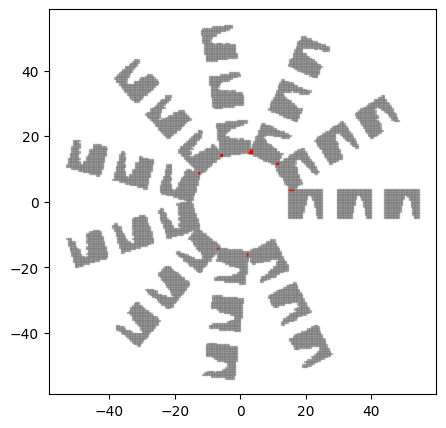

--------------------------------------------------
label: VentHole Chromosome_153: ['DoubleParabolicShape_79', 'GridStrictTransformation_466']
predict: (0.28919463554568203, 373.0309789999997, 457.5962262999998)
biased_fitness: 0.7316443389431819, fitness: 0.7049176180431821
shape parameter:
parameter_list: [ lower_coefficient: 1.1338099648682614, upper_coefficient: 2.279584386425475, lower_y-intercept: 2.0917252367448183, upper_y-intercept_from_lower_y: 1.4168298830826904, lower_x_trans: -1.1658484640021607, ]
pattern parameter:
parameter_list: [ dx: 9.627357922865517, dy: 4.773921984221056, ]


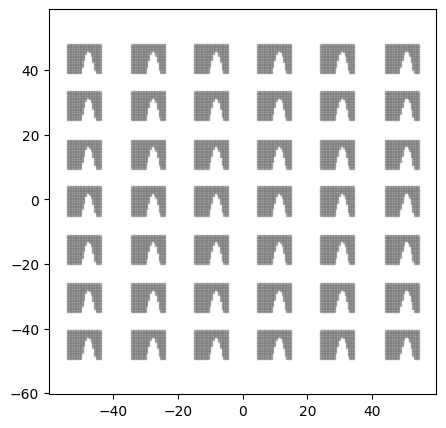

--------------------------------------------------
label: VentHole Chromosome_361: ['DoubleParabolicShape_92', 'CircularStrictTransformation_382']
predict: (0.2889134244207301, 373.1313319000001, 456.78992709999983)
biased_fitness: 0.7353665782926988, fitness: 0.7112594607926994
shape parameter:
parameter_list: [ lower_coefficient: 1.1338099648682614, upper_coefficient: 0.0, lower_y-intercept: 2.0917252367448183, upper_y-intercept_from_lower_y: 1.4168298830826904, lower_x_trans: -1.1658484640021607, ]
pattern parameter:
parameter_list: [ di: 11.586554066554307, dx: 4.6257002496631765, phi: 0.41887902047863906, ]


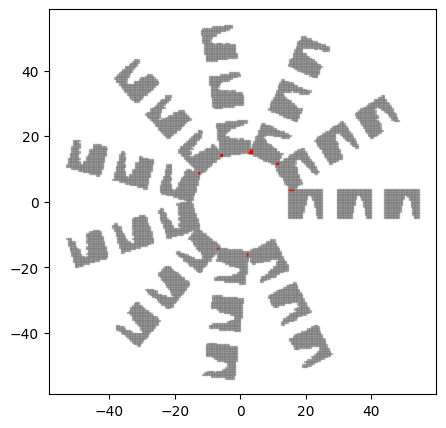

--------------------------------------------------
label: VentHole Chromosome_361: ['DoubleParabolicShape_153', 'CornerTransformation_153']
predict: (0.2890306455788625, 372.87798219999996, 457.1414881999998)
biased_fitness: 0.7352646924113756, fitness: 0.7095961922113762
shape parameter:
parameter_list: [ lower_coefficient: 1.1338099648682614, upper_coefficient: 2.279584386425475, lower_y-intercept: 2.0917252367448183, upper_y-intercept_from_lower_y: 1.4168298830826904, lower_x_trans: -1.1658484640021607, ]
pattern parameter:
parameter_list: [ di: 8.147181929275078, dx: 7.538579107376082, phi: 0.4279057157661879, rot_count: 3.0, ]


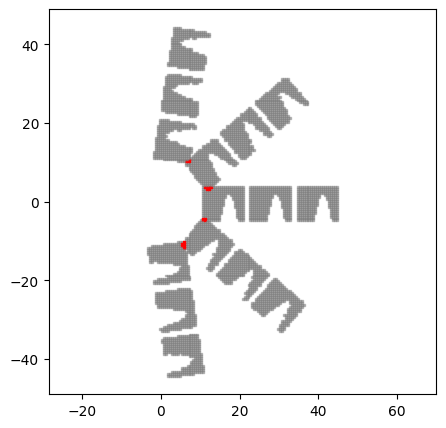

--------------------------------------------------
label: VentHole Chromosome_495: ['DoubleParabolicShape_361', 'GridStrictTransformation_92']
predict: (0.2891946355456838, 373.0309789999997, 457.5962262999998)
biased_fitness: 0.7316443389431642, fitness: 0.7049176180431643
shape parameter:
parameter_list: [ lower_coefficient: 1.1338099648682614, upper_coefficient: 2.279584386425475, lower_y-intercept: 2.0917252367448183, upper_y-intercept_from_lower_y: 1.4168298830826904, lower_x_trans: -1.1658484640021607, ]
pattern parameter:
parameter_list: [ dx: 9.627357922865517, dy: 4.773921984221056, ]


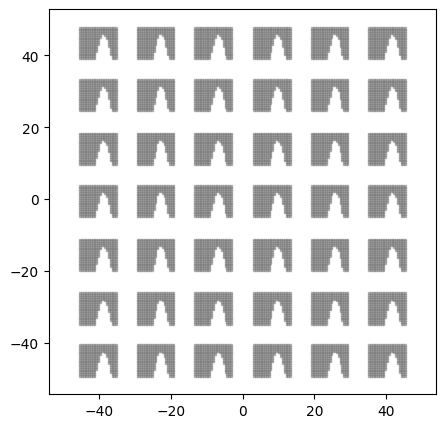

--------------------------------------------------
label: VentHole Chromosome_92: ['DoubleParabolicShape_495', 'CircularStrictTransformation_79']
predict: (0.2899758416269309, 373.38434930000005, 457.72025149999985)
biased_fitness: 0.7211106356306907, fitness: 0.6947185797306913
shape parameter:
parameter_list: [ lower_coefficient: 1.1338099648682614, upper_coefficient: 2.279584386425475, lower_y-intercept: 2.0917252367448183, upper_y-intercept_from_lower_y: 1.4168298830826904, lower_x_trans: -1.1658484640021607, ]
pattern parameter:
parameter_list: [ di: 11.586554066554307, dx: 4.6257002496631765, phi: 0.41887902047863906, ]


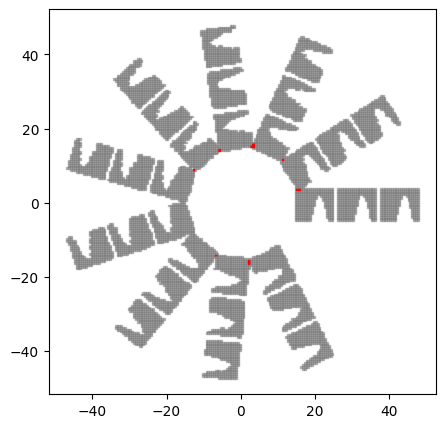

--------------------------------------------------
label: VentHole Chromosome_382: ['DoubleParabolicShape_153', 'CircularStrictTransformation_361']
predict: (0.2952163015333453, 373.15576859999993, 457.03277260000004)
biased_fitness: 0.6716810592665471, fitness: 0.6468942786665468
shape parameter:
parameter_list: [ lower_coefficient: 1.1338099648682614, upper_coefficient: 0.0, lower_y-intercept: 2.0917252367448183, upper_y-intercept_from_lower_y: 1.4168298830826904, lower_x_trans: -1.1658484640021607, ]
pattern parameter:
parameter_list: [ di: 11.586554066554307, dx: 4.6257002496631765, phi: 0.41887902047863906, ]


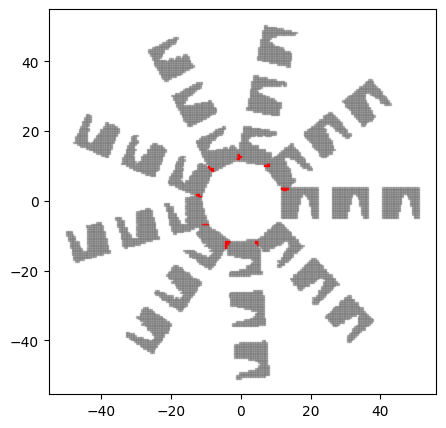

--------------------------------------------------
label: VentHole Chromosome_466: ['DoubleParabolicShape_155', 'CircularStrictTransformation_79']
predict: (0.28920611743044233, 373.00791360000005, 458.3908469999999)
biased_fitness: 0.7301017364955764, fitness: 0.7009450226955768
shape parameter:
parameter_list: [ lower_coefficient: 1.1338099648682614, upper_coefficient: 0.0, lower_y-intercept: 2.0917252367448183, upper_y-intercept_from_lower_y: 1.4168298830826904, lower_x_trans: -1.1658484640021607, ]
pattern parameter:
parameter_list: [ di: 11.586554066554307, dx: 1.4915941326936792, phi: 0.41887902047863906, ]


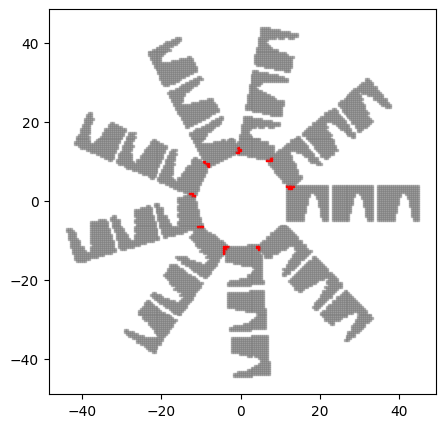

--------------------------------------------------
label: VentHole Chromosome_337: ['DoubleParabolicShape_337', 'CornerTransformation_337']
predict: (0.28847990948046887, 373.40821150000005, 458.39600529999996)
biased_fitness: 0.7345514140953109, fitness: 0.7061798211953112
shape parameter:
parameter_list: [ lower_coefficient: 1.1338099648682614, upper_coefficient: 0.0, lower_y-intercept: 2.0917252367448183, upper_y-intercept_from_lower_y: 1.4168298830826904, lower_x_trans: -1.1658484640021607, ]
pattern parameter:
parameter_list: [ di: 8.147181929275078, dx: 7.538579107376082, phi: 0.4279057157661879, rot_count: 3.0, ]


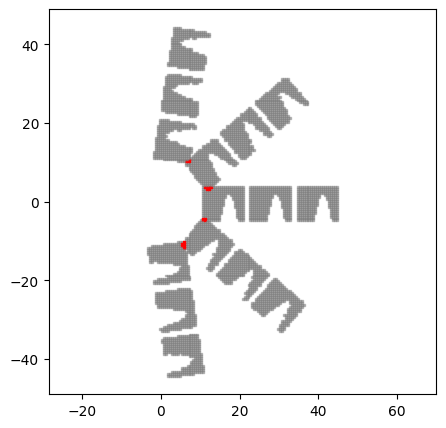

--------------------------------------------------
label: VentHole Chromosome_465: ['DoubleParabolicShape_466', 'CircularStrictTransformation_466']
predict: (0.29339571500247463, 373.1541798999999, 457.2993660999998)
biased_fitness: 0.6893648584752544, fitness: 0.6637751199752548
shape parameter:
parameter_list: [ lower_coefficient: 1.1338099648682614, upper_coefficient: 0.0, lower_y-intercept: 2.0917252367448183, upper_y-intercept_from_lower_y: 1.4168298830826904, lower_x_trans: -1.1658484640021607, ]
pattern parameter:
parameter_list: [ di: 11.586554066554307, dx: 4.6257002496631765, phi: 0.41887902047863906, ]


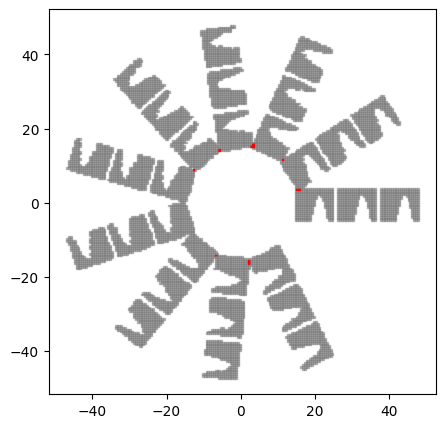

--------------------------------------------------
label: VentHole Chromosome_495: ['DoubleParabolicShape_466', 'CornerTransformation_403']
predict: (0.2891296693515457, 373.0811222, 458.8466192999997)
biased_fitness: 0.7294422124845434, fitness: 0.6990645989845443
shape parameter:
parameter_list: [ lower_coefficient: 1.1338099648682614, upper_coefficient: 0.0, lower_y-intercept: 2.0917252367448183, upper_y-intercept_from_lower_y: 1.6527530683403324, lower_x_trans: -1.1658484640021607, ]
pattern parameter:
parameter_list: [ di: 10.95705114092988, dx: 7.538579107376082, phi: 0.4279057157661879, rot_count: 3.0, ]


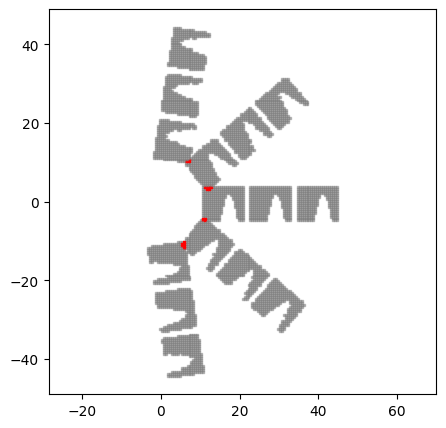

--------------------------------------------------
label: VentHole Chromosome_163: ['DoubleParabolicShape_403', 'GridStrictTransformation_466']
predict: (0.2889570716794505, 373.1184109999997, 457.7026602999998)
biased_fitness: 0.7331950856054974, fitness: 0.7063239267054973
shape parameter:
parameter_list: [ lower_coefficient: 1.1338099648682614, upper_coefficient: 2.279584386425475, lower_y-intercept: 2.0917252367448183, upper_y-intercept_from_lower_y: 1.4168298830826904, lower_x_trans: -1.1658484640021607, ]
pattern parameter:
parameter_list: [ dx: 9.627357922865517, dy: 4.773921984221056, ]


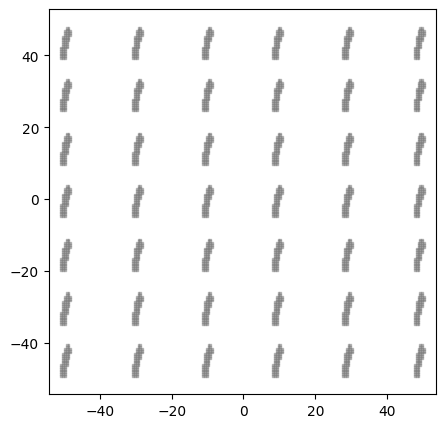

--------------------------------------------------
label: VentHole Chromosome_402: ['DoubleParabolicShape_402', 'CircularStrictTransformation_92']
predict: (0.28885265219115985, 372.90374339999994, 457.69680429999977)
biased_fitness: 0.7357536656884022, fitness: 0.7084707395884028
shape parameter:
parameter_list: [ lower_coefficient: 1.1338099648682614, upper_coefficient: 2.279584386425475, lower_y-intercept: 2.0917252367448183, upper_y-intercept_from_lower_y: 1.4168298830826904, lower_x_trans: -1.1658484640021607, ]
pattern parameter:
parameter_list: [ di: 11.586554066554307, dx: 3.689384721947351, phi: 0.7853981633974483, ]


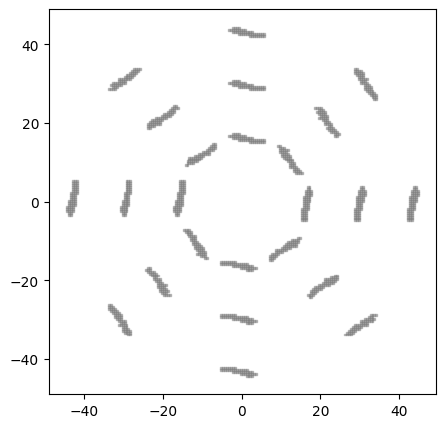

--------------------------------------------------
label: VentHole Chromosome_337: ['DoubleParabolicShape_79', 'CircularStrictTransformation_403']
predict: (0.2927343361286159, 373.01569120000016, 456.60136769999997)
biased_fitness: 0.69834406491384, fitness: 0.6745713442138405
shape parameter:
parameter_list: [ lower_coefficient: 1.1338099648682614, upper_coefficient: 0.0, lower_y-intercept: 2.0917252367448183, upper_y-intercept_from_lower_y: 1.4168298830826904, lower_x_trans: -1.1658484640021607, ]
pattern parameter:
parameter_list: [ di: 11.586554066554307, dx: 4.6257002496631765, phi: 0.41887902047863906, ]


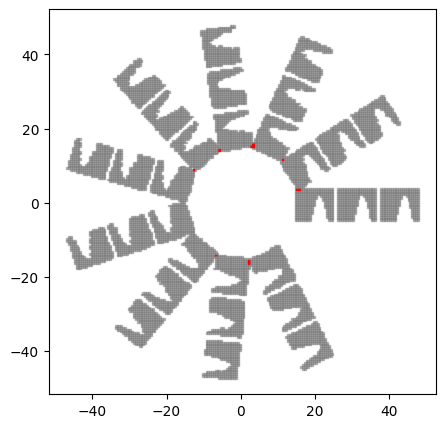

--------------------------------------------------
label: VentHole Chromosome_495: ['DoubleParabolicShape_495', 'CornerTransformation_153']
predict: (0.2889445960285606, 373.2956617, 457.0397373999999)
biased_fitness: 0.7334049330143941, fitness: 0.7088770442143943
shape parameter:
parameter_list: [ lower_coefficient: 1.1338099648682614, upper_coefficient: 0.0, lower_y-intercept: 2.0917252367448183, upper_y-intercept_from_lower_y: 1.6527530683403324, lower_x_trans: -1.1658484640021607, ]
pattern parameter:
parameter_list: [ di: 10.95705114092988, dx: 7.538579107376082, phi: 0.4279057157661879, rot_count: 3.0, ]


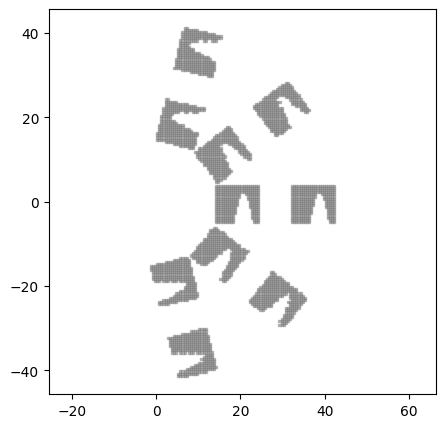

--------------------------------------------------
label: VentHole Chromosome_228: ['DoubleParabolicShape_79', 'CornerTransformation_92']
predict: (0.2891671354356693, 372.8878690999999, 457.8321883000001)
biased_fitness: 0.7324491853433076, fitness: 0.7047283586433071
shape parameter:
parameter_list: [ lower_coefficient: 1.1338099648682614, upper_coefficient: 0.0, lower_y-intercept: 2.0917252367448183, upper_y-intercept_from_lower_y: 1.4168298830826904, lower_x_trans: -1.1658484640021607, ]
pattern parameter:
parameter_list: [ di: 10.95705114092988, dx: 7.538579107376082, phi: 0.4279057157661879, rot_count: 3.0, ]


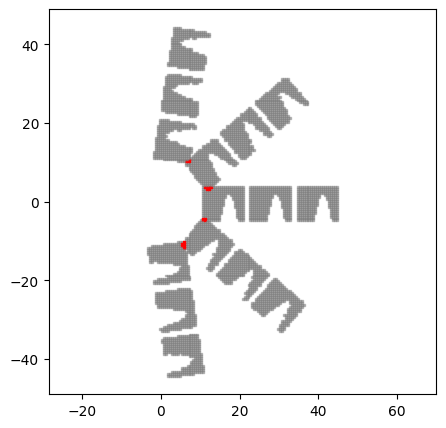

--------------------------------------------------
label: VentHole Chromosome_466: ['DoubleParabolicShape_79', 'CircularStrictTransformation_382']
predict: (0.29544591429676137, 373.01354669999995, 456.8414402000001)
biased_fitness: 0.6707631497323864, fitness: 0.646265922532386
shape parameter:
parameter_list: [ lower_coefficient: 1.1338099648682614, upper_coefficient: 2.279584386425475, lower_y-intercept: 2.0917252367448183, upper_y-intercept_from_lower_y: 1.4168298830826904, lower_x_trans: -1.1658484640021607, ]
pattern parameter:
parameter_list: [ di: 11.586554066554307, dx: 4.6257002496631765, phi: 0.41887902047863906, ]


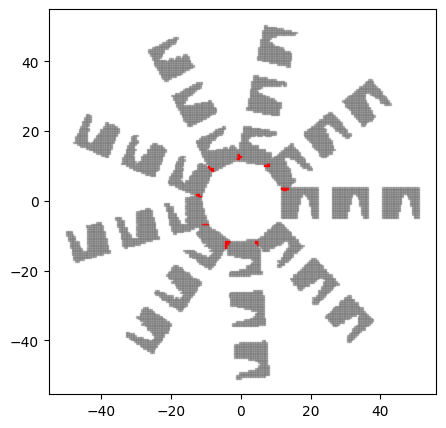

--------------------------------------------------
label: VentHole Chromosome_403: ['DoubleParabolicShape_495', 'CircularStrictTransformation_79']
predict: (0.28994238132352956, 373.31302030000006, 457.2271601999999)
biased_fitness: 0.7229307242647041, fitness: 0.6978752842647045
shape parameter:
parameter_list: [ lower_coefficient: 1.1338099648682614, upper_coefficient: 0.0, lower_y-intercept: 2.0917252367448183, upper_y-intercept_from_lower_y: 1.6527530683403324, lower_x_trans: -1.1658484640021607, ]
pattern parameter:
parameter_list: [ di: 11.586554066554307, dx: 4.6257002496631765, phi: 0.41887902047863906, ]


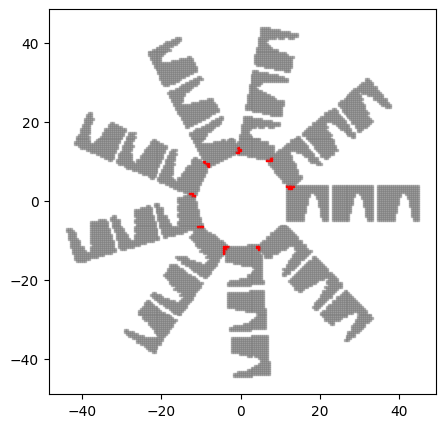

--------------------------------------------------
label: VentHole Chromosome_495: ['DoubleParabolicShape_402', 'GridStrictTransformation_163']
predict: (0.2903094790175944, 373.13697019999995, 458.3303650000001)
biased_fitness: 0.718285688424056, fitness: 0.6895685338240557
shape parameter:
parameter_list: [ lower_coefficient: 1.1338099648682614, upper_coefficient: 0.0, lower_y-intercept: 2.0917252367448183, upper_y-intercept_from_lower_y: 1.6527530683403324, lower_x_trans: -1.1658484640021607, ]
pattern parameter:
parameter_list: [ dx: 9.627357922865517, dy: 4.773921984221056, ]


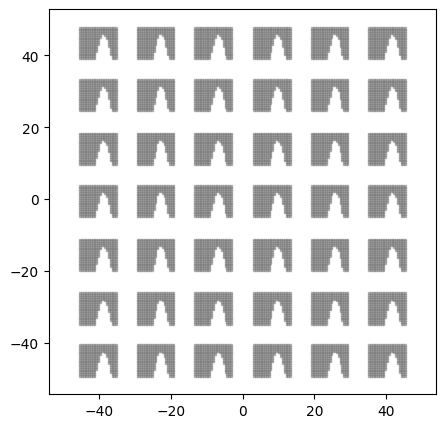

--------------------------------------------------
label: VentHole Chromosome_92: ['DoubleParabolicShape_92', 'CircularStrictTransformation_79']
predict: (0.291139404654122, 372.888871, 455.2161452)
biased_fitness: 0.7179515660587796, fitness: 0.6980808724587796
shape parameter:
parameter_list: [ lower_coefficient: 1.562216773625063, upper_coefficient: 2.279584386425475, lower_y-intercept: 2.0917252367448183, upper_y-intercept_from_lower_y: 1.4168298830826904, lower_x_trans: -1.1658484640021607, ]
pattern parameter:
parameter_list: [ di: 11.586554066554307, dx: 1.4915941326936792, phi: 0.41887902047863906, ]


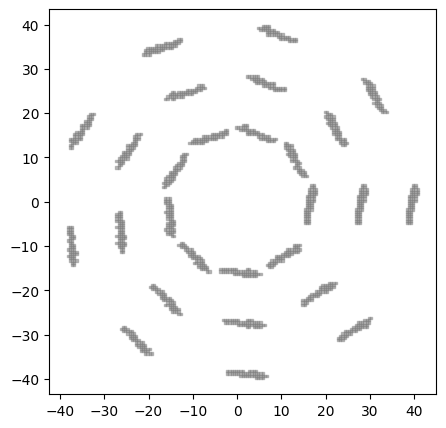

--------------------------------------------------
label: VentHole Chromosome_153: ['DoubleParabolicShape_155', 'CircularStrictTransformation_495']
predict: (0.28907526332188827, 372.9262993, 458.2432427999996)
biased_fitness: 0.732276786081118, fitness: 0.7033996562811192
shape parameter:
parameter_list: [ lower_coefficient: 1.1338099648682614, upper_coefficient: 2.279584386425475, lower_y-intercept: 1.867222660399366, upper_y-intercept_from_lower_y: 1.6527530683403324, lower_x_trans: -1.1658484640021607, ]
pattern parameter:
parameter_list: [ di: 14.892162902705529, dx: 1.4915941326936792, phi: 0.41887902047863906, ]


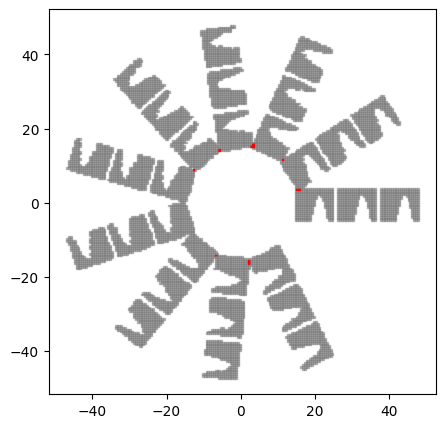

--------------------------------------------------
label: VentHole Chromosome_163: ['DoubleParabolicShape_92', 'CircularStrictTransformation_155']
predict: (0.29254403190296974, 373.14733120000005, 455.52083729999976)
biased_fitness: 0.7014866879703026, fitness: 0.6812188384703035
shape parameter:
parameter_list: [ lower_coefficient: 1.562216773625063, upper_coefficient: 2.279584386425475, lower_y-intercept: 2.0917252367448183, upper_y-intercept_from_lower_y: 1.4168298830826904, lower_x_trans: -1.1658484640021607, ]
pattern parameter:
parameter_list: [ di: 11.586554066554307, dx: 4.6257002496631765, phi: 0.41887902047863906, ]


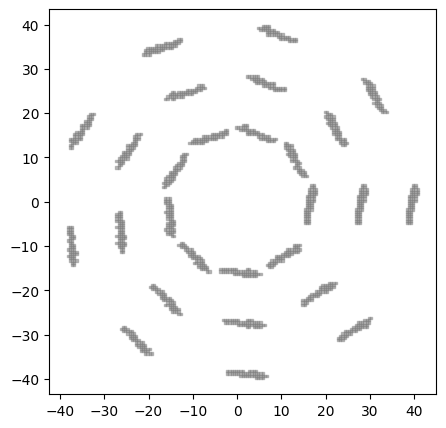

--------------------------------------------------
label: VentHole Chromosome_466: ['DoubleParabolicShape_163', 'CornerTransformation_361']
predict: (0.2894492924949701, 373.1597994999998, 457.2807665000001)
biased_fitness: 0.7288269455503001, fitness: 0.7033042450502995
shape parameter:
parameter_list: [ lower_coefficient: 1.562216773625063, upper_coefficient: 2.279584386425475, lower_y-intercept: 2.0917252367448183, upper_y-intercept_from_lower_y: 1.4168298830826904, lower_x_trans: -1.1658484640021607, ]
pattern parameter:
parameter_list: [ di: 8.147181929275078, dx: 7.538579107376082, phi: 0.4279057157661879, rot_count: 3.0, ]


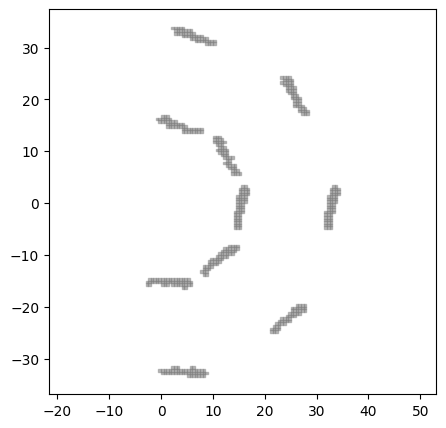

--------------------------------------------------
label: VentHole Chromosome_466: ['DoubleParabolicShape_228', 'GridStrictTransformation_92']
predict: (0.2899163285996891, 372.9156798999998, 458.12388840000006)
biased_fitness: 0.7241791779031104, fitness: 0.6956388725031099
shape parameter:
parameter_list: [ lower_coefficient: 1.1338099648682614, upper_coefficient: 0.0, lower_y-intercept: 2.0917252367448183, upper_y-intercept_from_lower_y: 1.4168298830826904, lower_x_trans: -1.1658484640021607, ]
pattern parameter:
parameter_list: [ dx: 9.627357922865517, dy: 4.773921984221056, ]


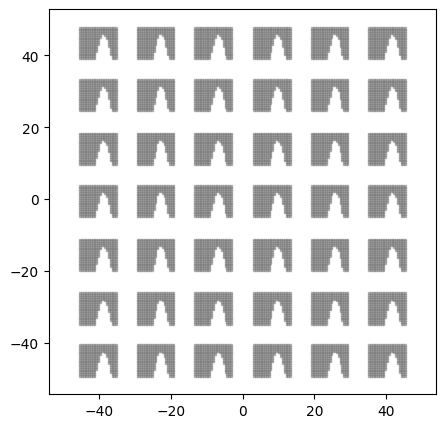

--------------------------------------------------
label: VentHole Chromosome_92: ['DoubleParabolicShape_92', 'CornerTransformation_361']
predict: (0.2905957450358656, 373.43640130000017, 459.5654012999998)
biased_fitness: 0.710856937941343, fitness: 0.679033536641344
shape parameter:
parameter_list: [ lower_coefficient: 1.1338099648682614, upper_coefficient: 2.279584386425475, lower_y-intercept: 2.0917252367448183, upper_y-intercept_from_lower_y: 1.4168298830826904, lower_x_trans: -1.1658484640021607, ]
pattern parameter:
parameter_list: [ di: 10.95705114092988, dx: 7.538579107376082, phi: 0.4279057157661879, rot_count: 3.0, ]


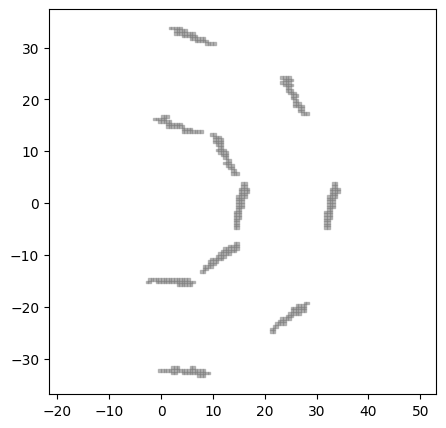

--------------------------------------------------
label: VentHole Chromosome_79: ['DoubleParabolicShape_337', 'CornerTransformation_92']
predict: (0.2891671354356693, 372.8878690999999, 457.8321883000001)
biased_fitness: 0.7324491853433076, fitness: 0.7047283586433071
shape parameter:
parameter_list: [ lower_coefficient: 1.1338099648682614, upper_coefficient: 0.0, lower_y-intercept: 2.0917252367448183, upper_y-intercept_from_lower_y: 1.4168298830826904, lower_x_trans: -1.1658484640021607, ]
pattern parameter:
parameter_list: [ di: 10.95705114092988, dx: 7.538579107376082, phi: 0.4279057157661879, rot_count: 3.0, ]


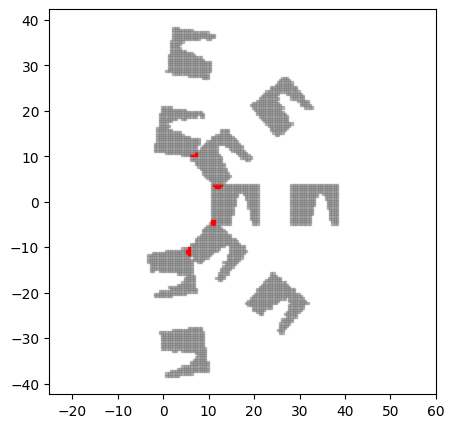

--------------------------------------------------
label: VentHole Chromosome_223: ['DoubleParabolicShape_466', 'GridStrictTransformation_79']
predict: (0.28980540092243956, 373.15890999999993, 457.59973229999997)
biased_fitness: 0.7246341561756048, fitness: 0.6981527792756047
shape parameter:
parameter_list: [ lower_coefficient: 1.562216773625063, upper_coefficient: 2.279584386425475, lower_y-intercept: 2.0917252367448183, upper_y-intercept_from_lower_y: 1.4168298830826904, lower_x_trans: -1.1658484640021607, ]
pattern parameter:
parameter_list: [ dx: 9.627357922865517, dy: 4.773921984221056, ]


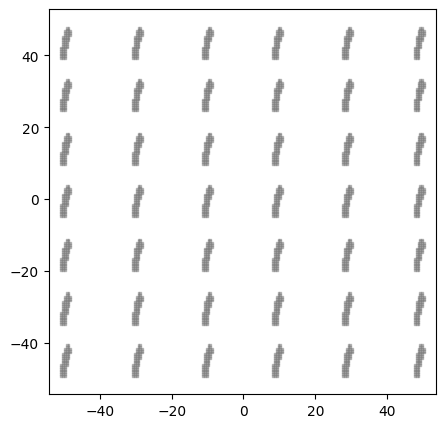

--------------------------------------------------
label: VentHole Chromosome_92: ['DoubleParabolicShape_466', 'GridStrictTransformation_223']
predict: (0.28834533551543773, 372.99993439999986, 457.0325566)
biased_fitness: 0.7414819908456235, fitness: 0.7163841898456232
shape parameter:
parameter_list: [ lower_coefficient: 1.1338099648682614, upper_coefficient: 2.279584386425475, lower_y-intercept: 2.0917252367448183, upper_y-intercept_from_lower_y: 1.4168298830826904, lower_x_trans: -1.1658484640021607, ]
pattern parameter:
parameter_list: [ dx: 9.627357922865517, dy: 4.773921984221056, ]


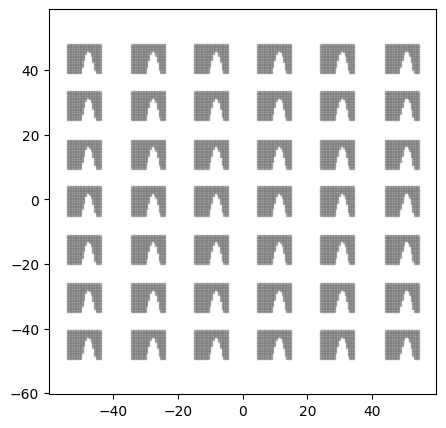

--------------------------------------------------
label: VentHole Chromosome_149: ['DoubleParabolicShape_155', 'CircularStrictTransformation_153']
predict: (0.29032963648189236, 373.1473454000001, 457.91306849999955)
biased_fitness: 0.7188460803810763, fitness: 0.6914015656810779
shape parameter:
parameter_list: [ lower_coefficient: 1.1338099648682614, upper_coefficient: 2.279584386425475, lower_y-intercept: 2.0917252367448183, upper_y-intercept_from_lower_y: 1.4168298830826904, lower_x_trans: -1.1658484640021607, ]
pattern parameter:
parameter_list: [ di: 14.892162902705529, dx: 1.4915941326936792, phi: 0.41887902047863906, ]


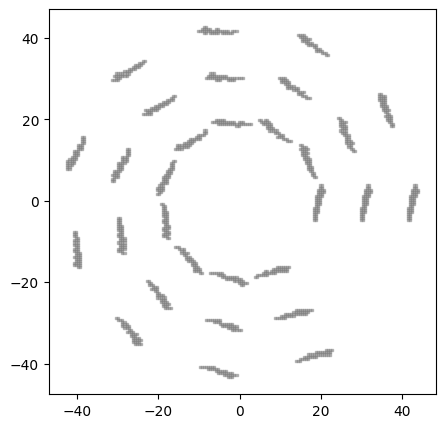

--------------------------------------------------
label: VentHole Chromosome_155: ['DoubleParabolicShape_466', 'CircularStrictTransformation_361']
predict: (0.28948871736302073, 372.9181415, 456.18507659999995)
biased_fitness: 0.7323156826697927, fitness: 0.7095967358697929
shape parameter:
parameter_list: [ lower_coefficient: 1.1338099648682614, upper_coefficient: 2.279584386425475, lower_y-intercept: 2.0917252367448183, upper_y-intercept_from_lower_y: 1.4168298830826904, lower_x_trans: -1.1658484640021607, ]
pattern parameter:
parameter_list: [ di: 11.586554066554307, dx: 4.6257002496631765, phi: 0.41887902047863906, ]


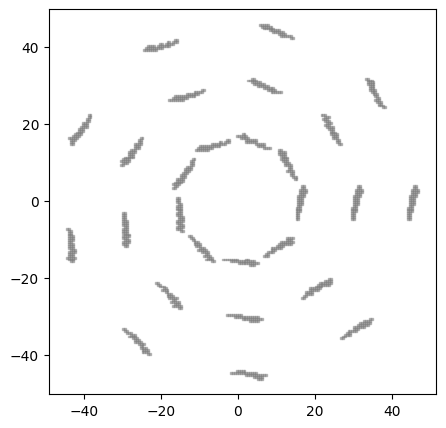

--------------------------------------------------
label: VentHole Chromosome_495: ['DoubleParabolicShape_92', 'CircularStrictTransformation_155']
predict: (0.29319307605414924, 373.2397647000001, 455.75695169999995)
biased_fitness: 0.693876983158507, fitness: 0.6730856574585073
shape parameter:
parameter_list: [ lower_coefficient: 1.1338099648682614, upper_coefficient: 2.279584386425475, lower_y-intercept: 2.0917252367448183, upper_y-intercept_from_lower_y: 1.4168298830826904, lower_x_trans: -1.1658484640021607, ]
pattern parameter:
parameter_list: [ di: 11.586554066554307, dx: 4.6257002496631765, phi: 0.41887902047863906, ]


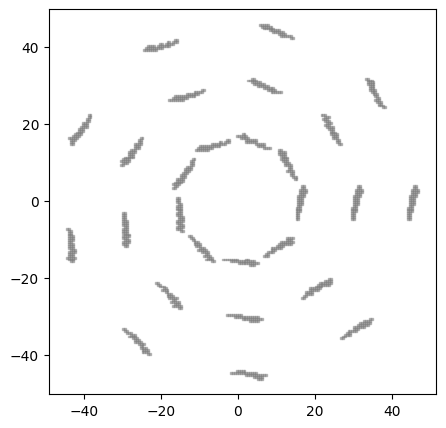

--------------------------------------------------
label: VentHole Chromosome_163: ['DoubleParabolicShape_79', 'CircularStrictTransformation_466']
predict: (0.29022039921397225, 372.62281529999996, 458.3536020999998)
biased_fitness: 0.722729096560278, fitness: 0.6929139208602785
shape parameter:
parameter_list: [ lower_coefficient: 1.1338099648682614, upper_coefficient: 2.279584386425475, lower_y-intercept: 2.0917252367448183, upper_y-intercept_from_lower_y: 1.4168298830826904, lower_x_trans: -1.1658484640021607, ]
pattern parameter:
parameter_list: [ di: 14.892162902705529, dx: 1.4915941326936792, phi: 0.41887902047863906, ]


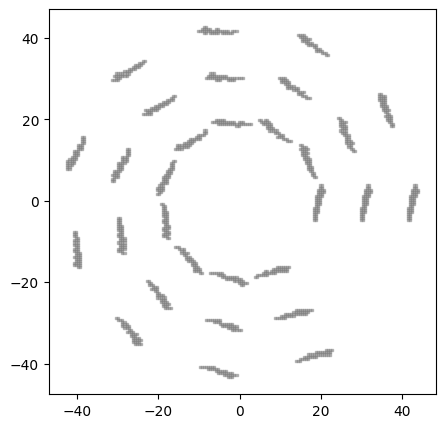

In [4]:
from src.grid.visualize_points import visualize_points


for pop in suite.unique_population:
    print("-" * 50)
    print(f"label: {pop.label}")
    print(f"predict: {pop.fitness_pure_result}")
    print(f"biased_fitness: {pop.biased_fitness}, fitness: {pop.fitness}")

    shape, pattern = pop.gene_tuple
    print("shape parameter:")
    shape.print_parameter_info()
    print("pattern parameter:")
    pattern.print_parameter_info()

    visualize_points(
        pop.pattern.pattern_matrix,
        pop.pattern.pattern_unit.grid.k,
        fig_size=(5, 5),
    )